In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.0.0
Eager execution: True


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

Name: /physical_device:GPU:0   Type: GPU


In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\sunlin\.keras\datasets\iris_training.csv


In [6]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [8]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [9]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([6.4, 5.7, 6.5, 5.1, 6.7, 6.1, 5.4, 5.4, 6.8, 6.4, 5.6, 5.8, 4.6,
       5.5, 5.3, 5.8, 5.2, 4.9, 4.9, 6.4, 5.7, 4.9, 6.5, 5.9, 7.3, 5.8,
       6.5, 4.7, 6.3, 4.9, 6.3, 5. ], dtype=float32)>), ('sepal_width', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([2.8, 2.8, 3.2, 3.8, 3.1, 2.8, 3.9, 3. , 2.8, 2.7, 2.7, 2.6, 3.2,
       2.4, 3.7, 2.8, 3.4, 3.1, 2.4, 2.8, 2.8, 2.5, 3. , 3.2, 2.9, 4. ,
       3. , 3.2, 3.4, 3.1, 2.7, 3.2], dtype=float32)>), ('petal_length', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([5.6, 4.1, 5.1, 1.6, 5.6, 4.7, 1.3, 4.5, 4.8, 5.3, 4.2, 4. , 1.4,
       3.8, 1.5, 5.1, 1.4, 1.5, 3.3, 5.6, 4.5, 4.5, 5.8, 4.8, 6.3, 1.2,
       5.2, 1.6, 5.6, 1.5, 4.9, 1.2], dtype=float32)>), ('petal_width', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([2.2, 1.3, 2. , 0.2, 2.4, 1.2, 0.4, 1.5, 1.4, 1.9, 1.3, 1.2, 0.2,
       1.1, 0.2, 2.4, 0.2, 0.1, 1

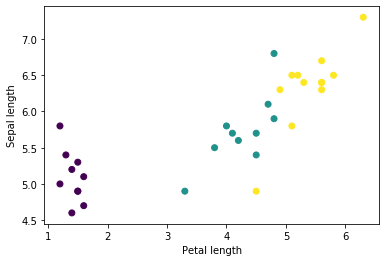

In [10]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [11]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [12]:
train_dataset = train_dataset.map(pack_features_vector)

In [13]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.9 2.5 4.5 1.7]
 [6.5 3.  5.5 1.8]
 [7.2 3.2 6.  1.8]
 [5.5 2.6 4.4 1.2]
 [7.9 3.8 6.4 2. ]], shape=(5, 4), dtype=float32)


In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [15]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=231, shape=(5, 3), dtype=float32, numpy=
array([[ 0.86080176, -1.4462632 , -0.32762966],
       [ 1.1155393 , -1.8637936 , -0.4266909 ],
       [ 1.220795  , -2.0439887 , -0.46598795],
       [ 1.0307518 , -1.6214632 , -0.42148882],
       [ 1.4794991 , -2.3249505 , -0.6063282 ]], dtype=float32)>

In [16]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=236, shape=(5, 3), dtype=float32, numpy=
array([[0.712123  , 0.07089398, 0.21698304],
       [0.7906824 , 0.0401878 , 0.16912974],
       [0.81744814, 0.03123076, 0.15132116],
       [0.76655364, 0.05403812, 0.17940824],
       [0.8722383 , 0.01942601, 0.10833576]], dtype=float32)>

In [17]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [2 2 2 1 2 0 2 2 1 2 0 1 2 1 0 0 0 0 1 0 2 0 2 0 2 0 0 2 2 1 0 1]


In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.477400779724121


In [20]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [22]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.477400779724121
Step: 1,         Loss: 1.2173880338668823


In [23]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    epoch_accuracy(y, model(x))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.162, Accuracy: 52.500%
Epoch 050: Loss: 0.129, Accuracy: 98.333%
Epoch 100: Loss: 0.065, Accuracy: 98.333%
Epoch 150: Loss: 0.061, Accuracy: 99.167%
Epoch 200: Loss: 0.052, Accuracy: 99.167%


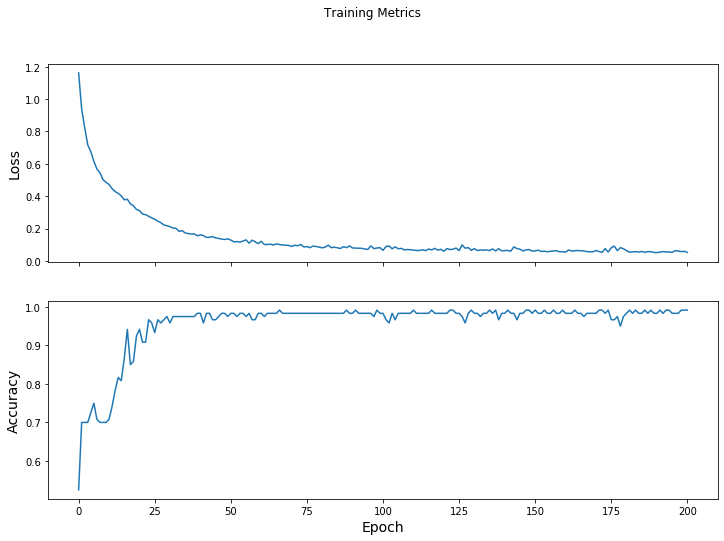

In [24]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [25]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [26]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [27]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [28]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=115075, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [29]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (100.0%)
Example 1 prediction: Iris versicolor (98.0%)
Example 2 prediction: Iris virginica (98.4%)
